In [5]:
import sys
import os

def get_FGCE_Directory():
    """Get the path of the 'FGCE-Feasible-Group-Counterfactual-Explanations-for-Auditing-Fairness' directory."""
    current_dir = os.getcwd()
    target_dir = 'FGCE-Feasible-Group-Counterfactual-Explanations-for-Auditing-Fairness'
    
    while os.path.basename(current_dir) != target_dir:
        current_dir = os.path.dirname(current_dir)
        if current_dir == os.path.dirname(current_dir):
            return None
        
    return current_dir

def get_system_slash():
    """Get the system-specific directory separator."""
    return os.sep

FGCE_DIR = get_FGCE_Directory()
sys.path.append(FGCE_DIR)
sep = get_system_slash()
sys.path.append(FGCE_DIR + get_system_slash() + 'src')
from main import *

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16


def plot(datasetName, face_dists, gfce_dists, face_wij, gfce_wij, d_method, max_d):
    fig, ax1 = plt.subplots()
    

    ax1.plot(range(1, len(face_wij)+1), face_wij, '-o', color='green', label="Face Wij Distance")
    ax1.plot(range(1, len(gfce_wij)+1), gfce_wij, '-o', color='blue', label="GFCE Wij Distance")
    ax1.set_xlabel("K")
    ax1.set_ylabel("Avg Wij Distance")
    ax1.set_xticks(range(1, len(face_wij)+1))

    ax2 = ax1.twinx()

    ax2.plot(range(1, len(face_dists)+1), face_dists, '-o', label="Face Vector Distances")
    ax2.plot(range(1, len(gfce_dists)+1), gfce_dists, '-o', label="FGCE Vector Distances")
    ax2.set_ylabel("Avg Vector Distance")

    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    handles = handles1 + handles2
    labels = labels1 + labels2
    ax1.legend(handles, labels, loc='lower right')

    # plt.legend(loc='best') 
    plt.tight_layout()
    fig_size = (8, 6) 
    plt.gcf().set_size_inches(fig_size)
    plt.savefig(f"{FGCE_DIR}{sep}tmp{sep}{datasetName}{sep}figs{sep}Coverage_constrained_face_gface_comparison_d_method_{d_method}_maxd_{max_d}_normalized.pdf")

    plt.show()

# Student

In [ ]:
face_dists = []
face_wij = []
gfce_dists = []
gfce_wij = []
datasetName = "Student"
max_d = 1000000000
for k in range(1, 6, 1):
    print(f"Running for {k}th time")

    results, data_np, attr_col_mapping, data_df_copy, face_vector_distances, gfce_vector_distances, face_wij_distances, gfce_wij_distances = main_coverage_constrained_GCFEs(epsilon=3, tp=0.6, td=0.001,
                            datasetName=datasetName, group_identifier='sex',
                            classifier='lr', compare_with_Face= True,
                            skip_model_training=True, skip_graph_creation=True, skip_gcfe_calculation=False,
                            k=k, max_d = max_d, cost_function="max_path_cost")

    if face_vector_distances == None:
        continue
    face_dists.append(face_vector_distances)
    gfce_dists.append(gfce_vector_distances)
    face_wij.append(face_wij_distances)
    gfce_wij.append(gfce_wij_distances)

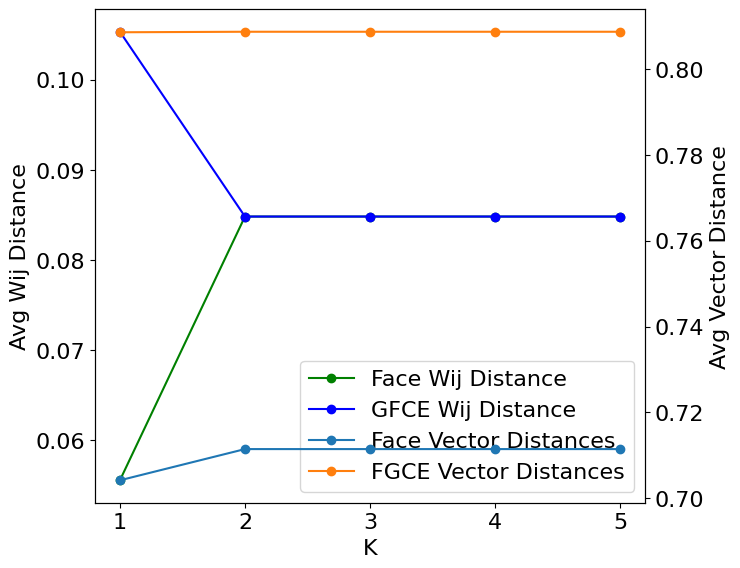

In [4]:
plot(datasetName, face_dists, gfce_dists, face_wij, gfce_wij, "max_path_cost", max_d)

# Compas

In [ ]:
face_dists = []
face_wij = []
gfce_dists = []
gfce_wij = []
datasetName = "Compas"
max_d = 10000000000000

for k in range(1, 6, 1):
    print(f"Running for {k}th time")

    results, data_np, attr_col_mapping, data_df_copy, face_vector_distances, gfce_vector_distances, face_wij_distances, gfce_wij_distances = main_coverage_constrained_GCFEs(epsilon=0.3, tp=0.6, td=0.001,
                            datasetName=datasetName, group_identifier='sex',
                            classifier='lr', compare_with_Face= True,
                            skip_model_training=True, skip_graph_creation=True, skip_gcfe_calculation=False,
                            k=k, max_d = max_d, cost_function="max_path_cost", bst=0.001)

    if face_vector_distances == None:
        continue
    face_dists.append(face_vector_distances)
    gfce_dists.append(gfce_vector_distances)
    face_wij.append(face_wij_distances)
    gfce_wij.append(gfce_wij_distances)

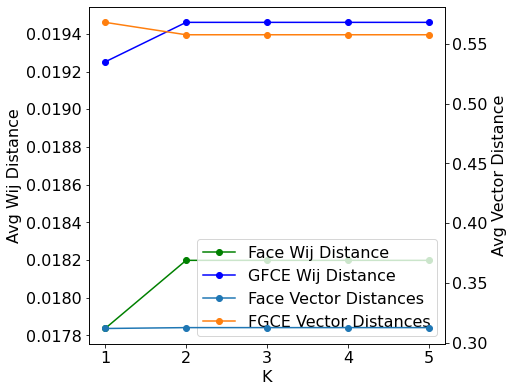

In [6]:
plot(datasetName, face_dists, gfce_dists, face_wij, gfce_wij, "max_path_cost", max_d)

# Heloc

In [ ]:
face_dists = []
face_wij = []
gfce_dists = []
gfce_wij = []
datasetName = "Heloc"
max_d = 1000000000000

for k in range(1, 6, 1):
    print(f"Running for {k}th time")
    
    results, data_np, attr_col_mapping, data_df_copy, face_vector_distances, gfce_vector_distances, face_wij_distances, gfce_wij_distances = main_coverage_constrained_GCFEs(epsilon=0.7, tp=0.6, td=0.001, 
                            datasetName='Heloc', group_identifier='MaxDelqEver', group_identifier_value=5,
                            skip_model_training=True,
                            skip_graph_creation=True,
                            skip_distance_calculation=True,
                            compare_with_Face=True,
                            classifier='lr', cost_function='max_path_cost',
                            k=k, min_d = 0, max_d = max_d, bst=0.01)


    if face_vector_distances == None:
        continue
    face_dists.append(face_vector_distances)
    gfce_dists.append(gfce_vector_distances)
    face_wij.append(face_wij_distances)
    gfce_wij.append(gfce_wij_distances)

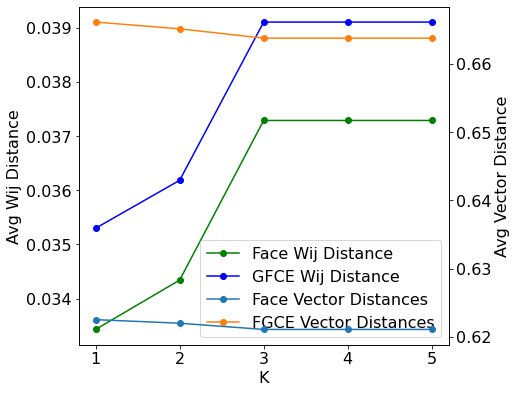

In [17]:
plot(datasetName, face_dists, gfce_dists, face_wij, gfce_wij, "max_path_cost", max_d)

# Adult

In [ ]:
face_dists = []
face_wij = []
gfce_dists = []
gfce_wij = []
datasetName = "Adult"
max_d = 10000000000000

for k in range(1, 6, 1):
    print(f"Running for {k}th time")

    results, data_np, attr_col_mapping, data_df_copy, face_vector_distances, gfce_vector_distances, face_wij_distances, gfce_wij_distances = main_coverage_constrained_GCFEs(epsilon=0.3, tp=0.6, td=0.001,
                            datasetName=datasetName, group_identifier='sex',
                            classifier='lr', compare_with_Face= True,
                            skip_model_training=True, skip_graph_creation=True, skip_distance_calculation=True, skip_gcfe_calculation=False,
                            k=k, max_d = max_d, cost_function="max_path_cost", bst=0.001)

    if face_vector_distances == None:
        continue
    face_dists.append(face_vector_distances)
    gfce_dists.append(gfce_vector_distances)
    face_wij.append(face_wij_distances)
    gfce_wij.append(gfce_wij_distances)

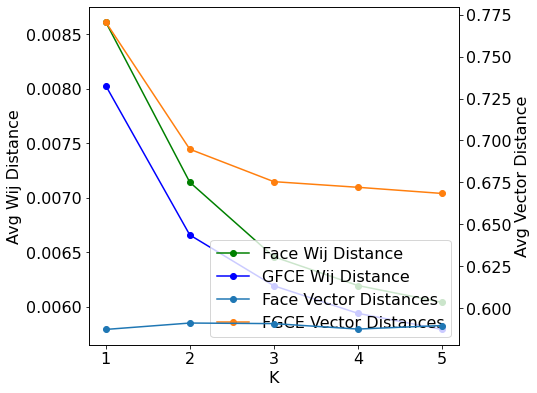

In [ ]:
plot(datasetName, face_dists, gfce_dists, face_wij, gfce_wij, "max_path_cost", max_d)